In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['figure.dpi'] = 150

In [2]:
def plot(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

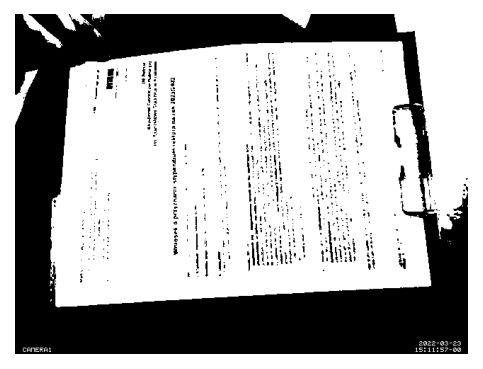

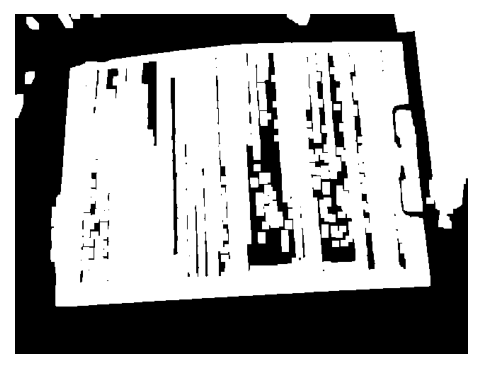

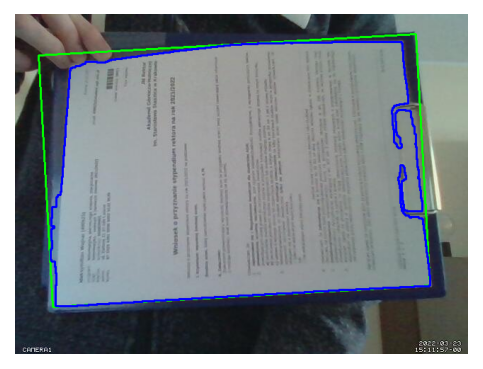

In [ ]:
image = cv2.imread('img1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

plot(thresh)

kernel = np.ones((3, 3))
thresh = cv2.erode(thresh, kernel, iterations=4)
thresh = cv2.dilate(thresh, kernel, iterations=4)

plot(thresh)

contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours = filter(lambda cont: cv2.arcLength(cont, False) > 1000, contours)
contour = max(contours, key=lambda cont: cv2.contourArea(cont))

rect = cv2.minAreaRect(contour)
box = cv2.boxPoints(rect).astype(np.int0)

image_copy = image.copy()

cv2.drawContours(image_copy, [box], -1, (0, 255, 0), 2)
cv2.drawContours(image_copy, [contour], -1, (255,0,0), 2)

plot(image_copy)

width, height = int(rect[1][0]), int(rect[1][1])

src_pts = box.astype("float32")
dst_pts = np.array([[0, height-1],
                    [0, 0],
                    [width-1, 0],
                    [width-1, height-1]], dtype="float32")

M = cv2.getPerspectiveTransform(src_pts, dst_pts)
cropped = cv2.warpPerspective(image, M, (width, height))

plot(cropped)